# Verify ML in commuter context
The code below takes labelled data, trains a standard fastai neural network and as a [tabular application](https://docs.fast.ai/tabular.html).
The goal is to verify that the model learns using data created for our personas.
* [Maria](../personas/maria.md) id:tnK534JMwwfhvUEycn69HPbhqkt2
    * [One year data](../data/tnK534JMwwfhvUEycn69HPbhqkt2_train_valid.csv)
    * [Test set](../data/tnK534JMwwfhvUEycn69HPbhqkt2_test.csv)
* [Andrea](../personas/andrea.md) id:ehaBtfOPDNZjzy1MEvjQmGo4Zv12
    * [One year data](../data/ehaBtfOPDNZjzy1MEvjQmGo4Zv12_train_valid.csv)
    * [Test set](../data/ehaBtfOPDNZjzy1MEvjQmGo4Zv12_test.csv)
* [Björn](../personas/bjorn.md) id:hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2
    * [One year data](../data/hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_train_valid.csv)
    * [Test set](../data/hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_test.csv)

In [1]:
#Setup
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *  # Quick accesss to tabular functionality     # Access to example data provided with fastai
from fastai.vision import *
PATH="../data/"
sys.path.append("../code") # go to parent dir
from commuter import *
dep_var = 'journey'
cat_names = ["detectedActivity","weekday"]
cont_names =["geoHash","minuteOfDay"]
procs = [FillMissing, Categorify, Normalize]
# Uncomment active user'
user = "tnK534JMwwfhvUEycn69HPbhqkt2" #Maria
#user = "ehaBtfOPDNZjzy1MEvjQmGo4Zv12" #Andrea
#user = "hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2" #Bjorn
personas = pd.read_csv("../data/personas.csv")
personaname = personas.loc[personas['id']==user]['name'].iloc[0]

### Training
Trains a model using one year data, and learning rate finder with fit_one_cycle policy.
Validation set is randomly selected as 10% of training set.

epoch,train_loss,valid_loss,accuracy
1,0.555379,0.238935,1.000000
2,0.146859,0.025918,1.000000
3,0.034347,0.006399,1.000000
4,0.012438,0.007590,0.998363
5,0.007827,0.016668,0.998363
6,0.003271,0.005738,0.998363
7,0.001803,0.007950,0.998363


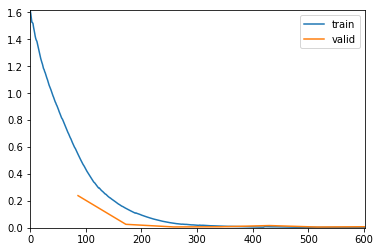

CPU times: user 7.96 s, sys: 1.1 s, total: 9.06 s
Wall time: 10.3 s


In [2]:
dataSet = pd.read_csv(PATH+user+"_train_valid.csv")
valid_idx = list(np.random.randint(0,len(dataSet),int(len(dataSet)*0.1)))
data = (TabularList.from_df(dataSet, path=user, cat_names=cat_names, cont_names=cont_names, procs=procs)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var)
                .databunch())
learner=tabular_learner(data, layers=[200,100], metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(7)

### Evaluate training on test set.

In [3]:
test_df = pd.read_csv(PATH+user+"_test.csv")
print("Result on test set for user "+personaname+" "+str(predict_journeys(learner,test_df)))

Result on test set for user Maria 1.0


### Evaluate training on scenarios.


In [4]:
scenario_1_df = pd.read_csv(PATH+user+"_scenario_1.csv")
scenario_1_predicted = learner.predict(scenario_1_df.iloc[0])
scenario_2_df = pd.read_csv(PATH+user+"_scenario_2.csv")
scenario_2_predicted = learner.predict(scenario_2_df.iloc[0])
scenario_3_df = pd.read_csv(PATH+user+"_scenario_3.csv")
scenario_3_predicted = learner.predict(scenario_3_df.iloc[0])
print("Scenario 1 for "+personaname+" (predicted:correct) "+str(scenario_1_predicted[0])+":"+str(scenario_1_df.iloc[0].journey))
print("Scenario 2 for "+personaname+" (predicted:correct) "+str(scenario_2_predicted[0])+":"+str(scenario_2_df.iloc[0].journey))
print("Scenario 3 for "+personaname+" (predicted:correct) "+str(scenario_3_predicted[0])+":"+str(scenario_3_df.iloc[0].journey))

Scenario 1 for Maria (predicted:correct) 8121680000:8121680000
Scenario 2 for Maria (predicted:correct) 8121690042:8121690042
Scenario 3 for Maria (predicted:correct) 8014081216:8014081216


### Confusion Matrix

In [5]:
testset = pd.read_csv(PATH+user+"_test.csv")
result = evaluate_learning(learner,testset)
a = np.asarray(result)
#print(a)
np.savetxt("saved/"+user+"_result.csv",a,delimiter=',',fmt=["%s","%10.2f","%10.2f","%s"])

Maria


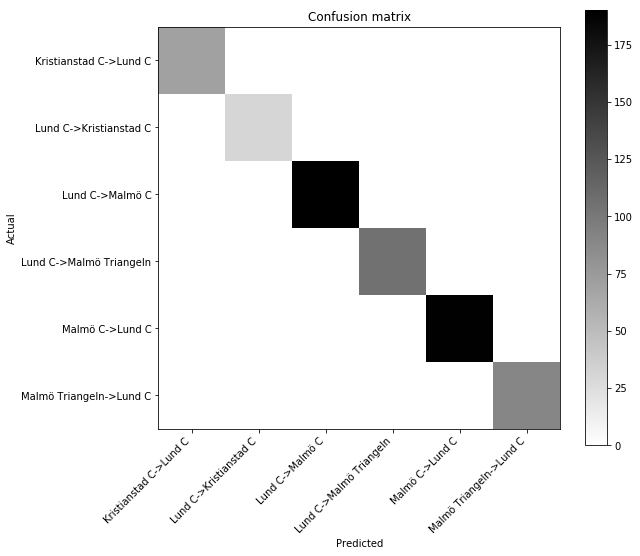

In [6]:
from pandas_ml import ConfusionMatrix
result_teaching= pd.read_csv("saved/"+user+"_result.csv",header=None,names=["Journey_pred", "Accuracy", "Day","Journey_corr"])
y_true = result_teaching["Journey_corr"].apply(from_to)
y_pred = result_teaching["Journey_pred"].apply(from_to)
confusion_matrix = ConfusionMatrix(y_true,y_pred)
print(personaname)
#print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot()

### Combining all personas as one
Playing around.....

epoch,train_loss,valid_loss,accuracy
1,1.125225,0.605895,0.853971
2,0.165600,0.082920,0.989752
3,0.082581,0.079590,0.980359
4,0.071668,0.042362,0.984628
5,0.042753,0.029907,0.994022
6,0.045687,0.033509,0.993168
7,0.039138,0.028071,0.993168


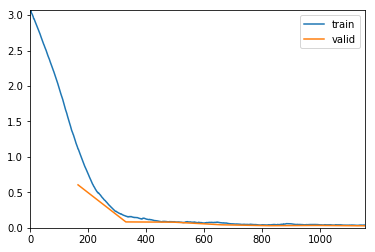

CPU times: user 13.5 s, sys: 1.27 s, total: 14.7 s
Wall time: 16.8 s


In [7]:
dataSet1 = pd.read_csv(PATH+"tnK534JMwwfhvUEycn69HPbhqkt2_train_valid.csv")
dataSet2 = pd.read_csv(PATH+"ehaBtfOPDNZjzy1MEvjQmGo4Zv12_train_valid.csv")
dataSet3 = pd.read_csv(PATH+"hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_train_valid.csv")
dataSet = pd.concat([dataSet1,dataSet2,dataSet3])
dataSet=dataSet.sample(frac=1)
valid_idx = list(np.random.randint(0,len(dataSet),int(len(dataSet)*0.1)))
data = (TabularList.from_df(dataSet, path=user, cat_names=cat_names, cont_names=cont_names, procs=procs)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var)
                .databunch())
learner=tabular_learner(data, layers=[200,100], metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(7)

In [8]:
dataSet1 = pd.read_csv(PATH+"tnK534JMwwfhvUEycn69HPbhqkt2_test.csv")
dataSet2 = pd.read_csv(PATH+"ehaBtfOPDNZjzy1MEvjQmGo4Zv12_test.csv")
dataSet3 = pd.read_csv(PATH+"hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2_test.csv")
test_df = pd.concat([dataSet1,dataSet2,dataSet3])
test_df=test_df.sample(frac=1)
print("Result on test set for all users as one:" +str(predict_journeys(learner,test_df)))

Result on test set for all users as one:0.9969088098918083


In [9]:
result = evaluate_learning(learner,test_df)
a = np.asarray(result)
#print(a)
np.savetxt("saved/all_result.csv",a,delimiter=',',fmt=["%s","%10.2f","%10.2f","%s"])

Maria


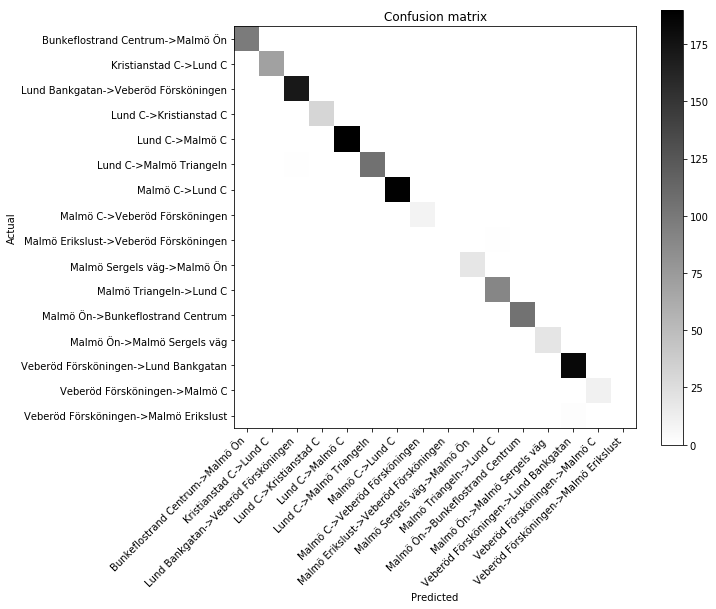

In [11]:
from pandas_ml import ConfusionMatrix
result_teaching= pd.read_csv("saved/all_result.csv",header=None,names=["Journey_pred", "Accuracy", "Day","Journey_corr"])
y_true = result_teaching["Journey_corr"].apply(from_to)
y_pred = result_teaching["Journey_pred"].apply(from_to)
confusion_matrix = ConfusionMatrix(y_true,y_pred)
print(personaname)
#print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot()